In [18]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
import pickle
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:

os.chdir('C:\\Users\\biswa\\PROJECT\\Cancer prediction')
data = pd.read_csv('data.csv')
display(data.head())
print("Dataset Shape: ", data.shape)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Dataset Shape:  (569, 32)


Null Values:
 radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


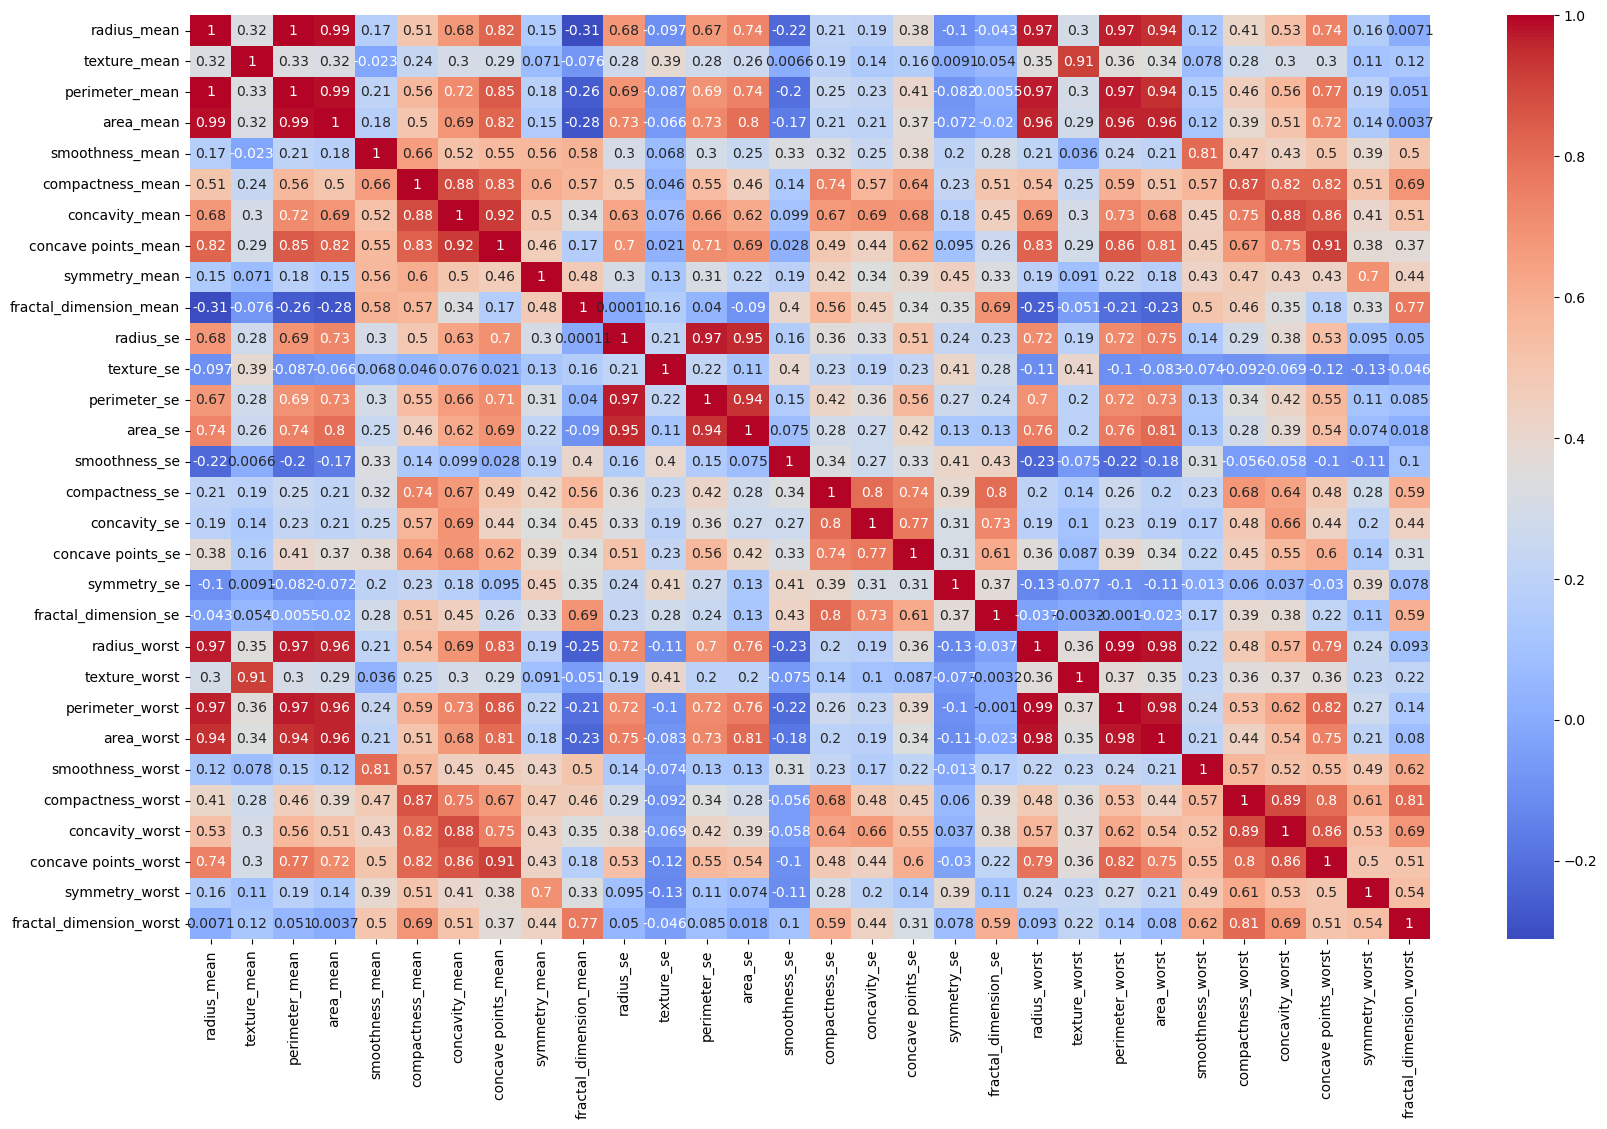

In [4]:
data['diagnosis'] = data['diagnosis'].astype('category').cat.codes
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']
print("Null Values:\n", X.isnull().sum())
plt.figure(figsize=(20, 12))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()


Null Values:
 radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


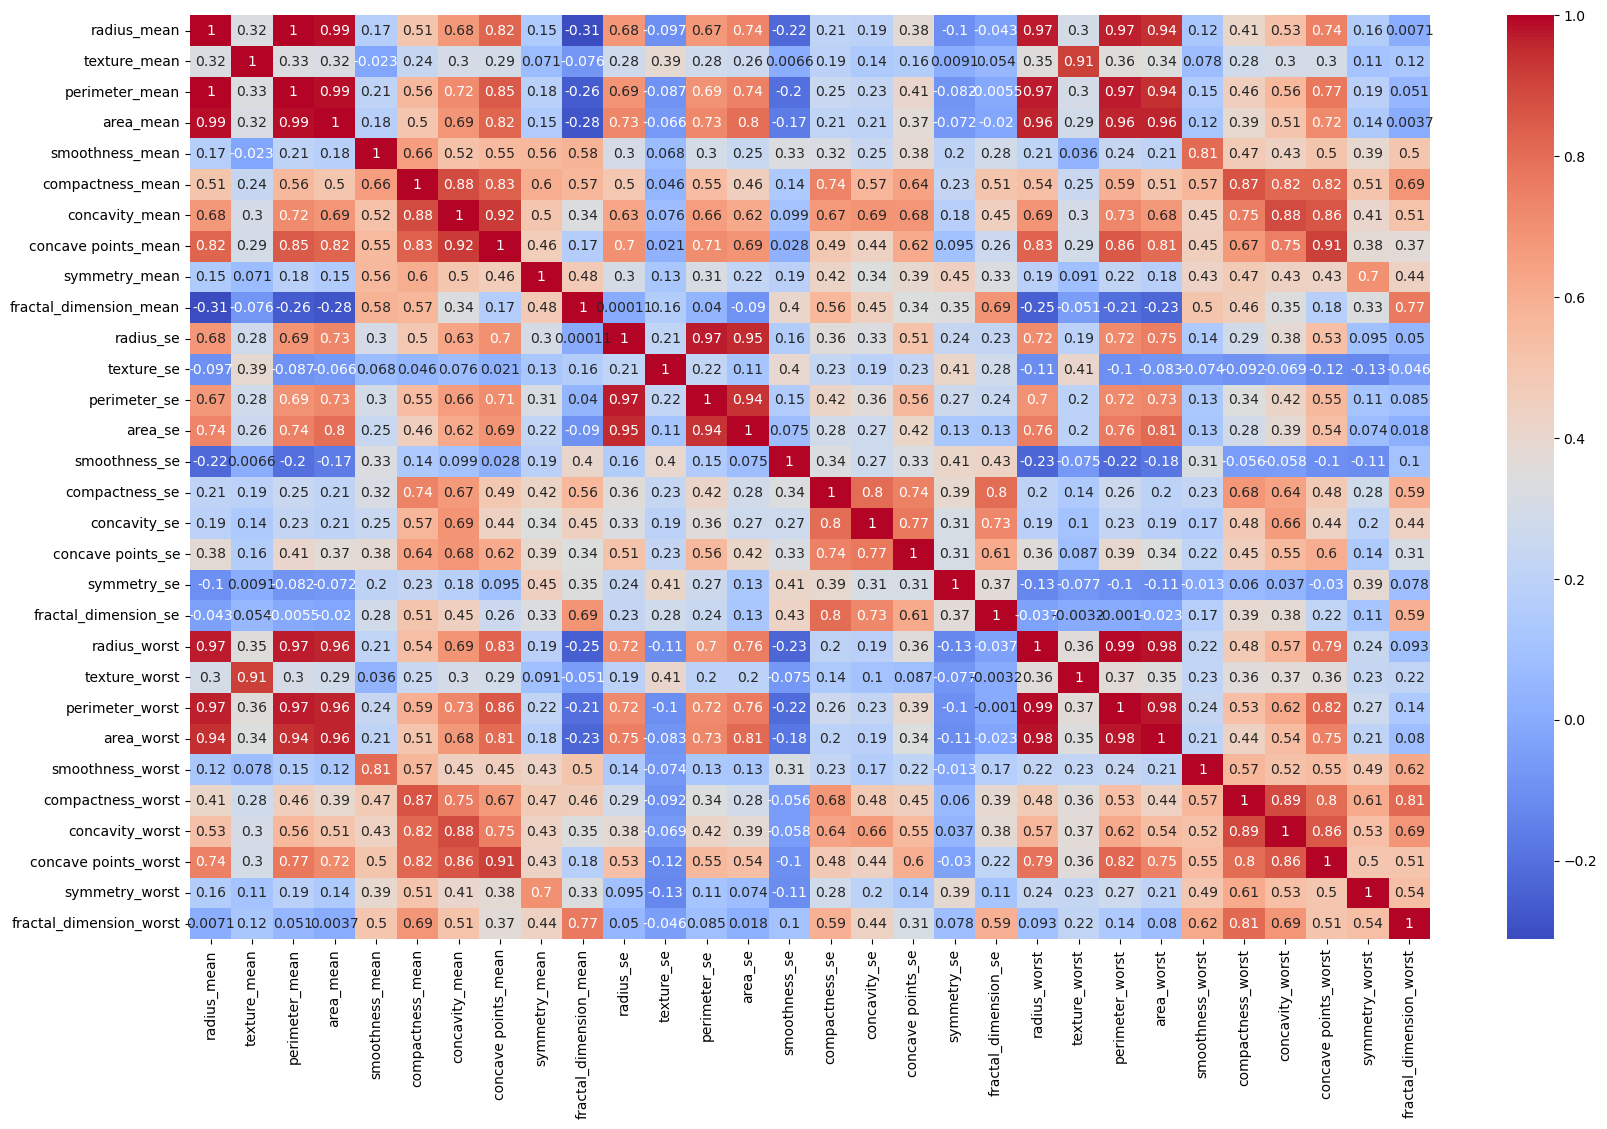

In [5]:
data['diagnosis'] = data['diagnosis'].astype('category').cat.codes
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']
print("Null Values:\n", X.isnull().sum())
plt.figure(figsize=(20, 12))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()


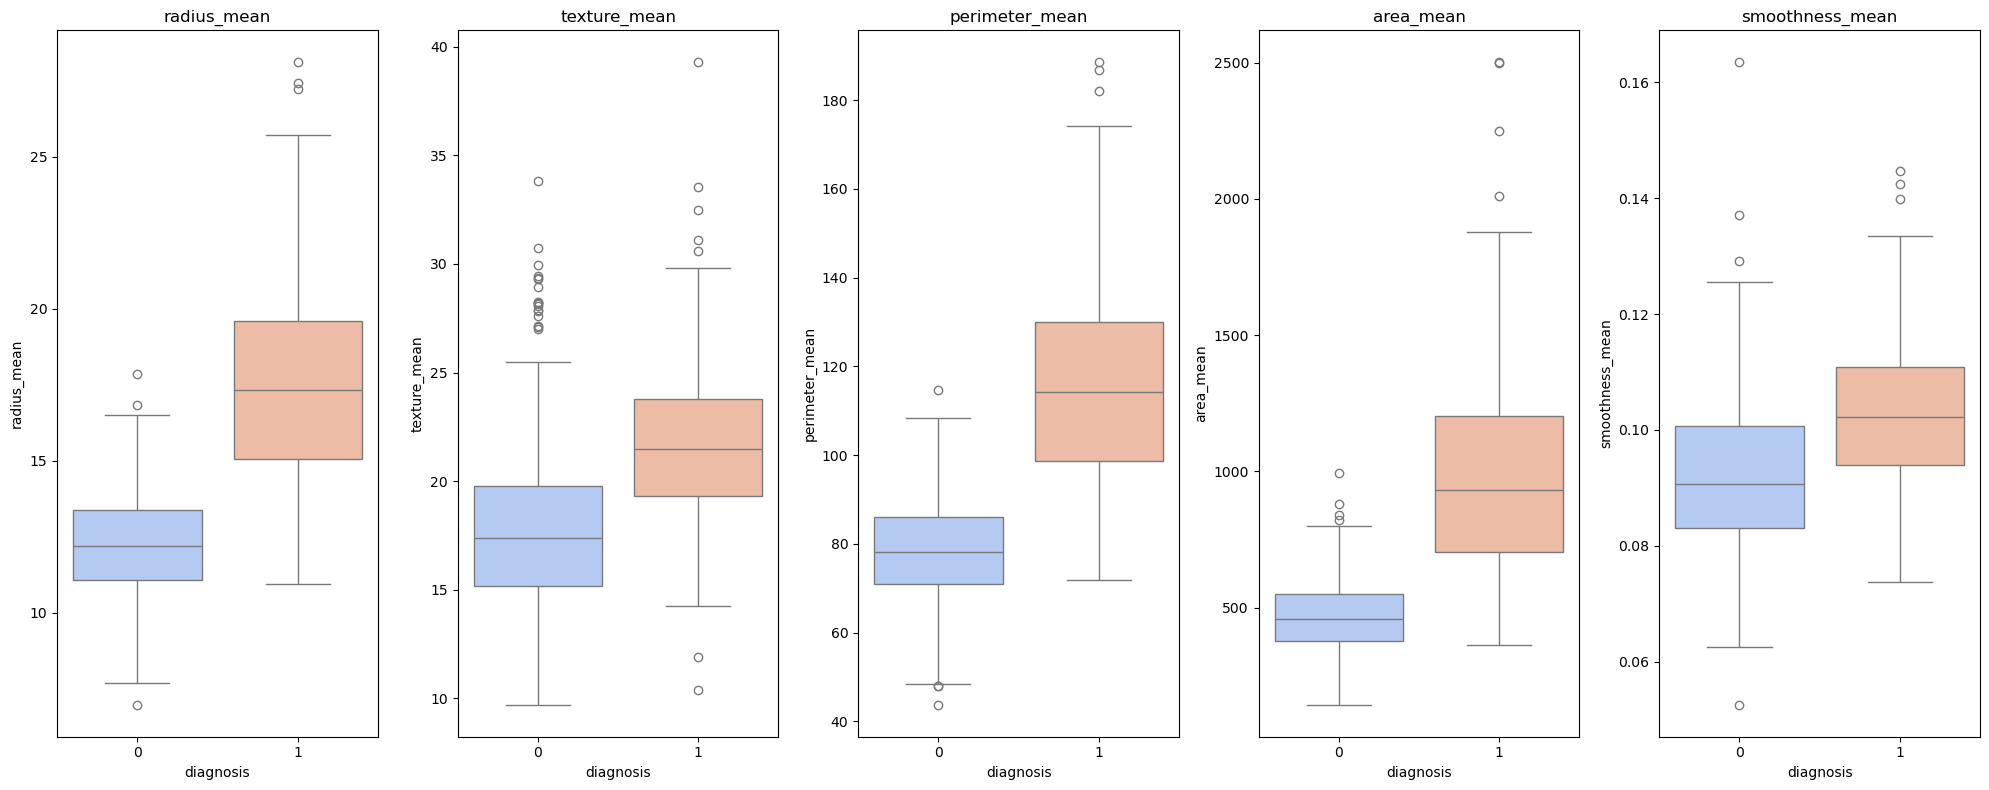

In [6]:
plt.figure(figsize=(20, 8))
for i, col in enumerate(X.columns[:5]):
    plt.subplot(1, 5, i+1)
    sns.boxplot(x=y, y=X[col], palette="coolwarm")
    plt.title(col)
plt.tight_layout()
plt.show()


In [7]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print("Class Distribution after SMOTE:\n", y_res.value_counts())


Class Distribution after SMOTE:
 diagnosis
1    357
0    357
Name: count, dtype: int64


In [9]:
def fit_model(X, y, algo_name, algorithm, param_grid, cv=10):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    grid = GridSearchCV(estimator=algorithm, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    pickle.dump(grid, open(f"{algo_name}.pkl", "wb")
    print(f"Best Parameters for {algo_name}:", grid.best_params_)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [10]:
param_svm = {'C': [0.1, 1, 100, 1000],
             'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5, 10, 100]}
fit_model(X_res, y_res, 'SVC', SVC(), param_svm, cv=10)


Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best Parameters for SVC: {'C': 1000, 'gamma': 0.0001}

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        69
           1       0.97      0.93      0.95        74

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

Accuracy Score: 0.951048951048951
Confusion Matrix:
 [[67  2]
 [ 5 69]]


In [11]:
param_rf = {'n_estimators': [100, 500, 1000, 2000]}
fit_model(X_res, y_res, 'RandomForest', RandomForestClassifier(), param_rf, cv=10)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Parameters for RandomForest: {'n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        69
           1       0.96      0.97      0.97        74

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143

Accuracy Score: 0.965034965034965
Confusion Matrix:
 [[66  3]
 [ 2 72]]


In [12]:
param_xgb = {'n_estimators': [100, 500, 1000, 2000]}
fit_model(X_res, y_res, 'XGBoost', XGBClassifier(), param_xgb, cv=10)
param_xgb = {'n_estimators': [100, 500, 1000, 2000]}
fit_model(X_res, y_res, 'XGBoost', XGBClassifier(), param_xgb, cv=10)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Parameters for XGBoost: {'n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        69
           1       0.97      1.00      0.99        74

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Accuracy Score: 0.986013986013986
Confusion Matrix:
 [[67  2]
 [ 0 74]]
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Parameters for XGBoost: {'n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        69
           1       0.97      1.00      0.99        74

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



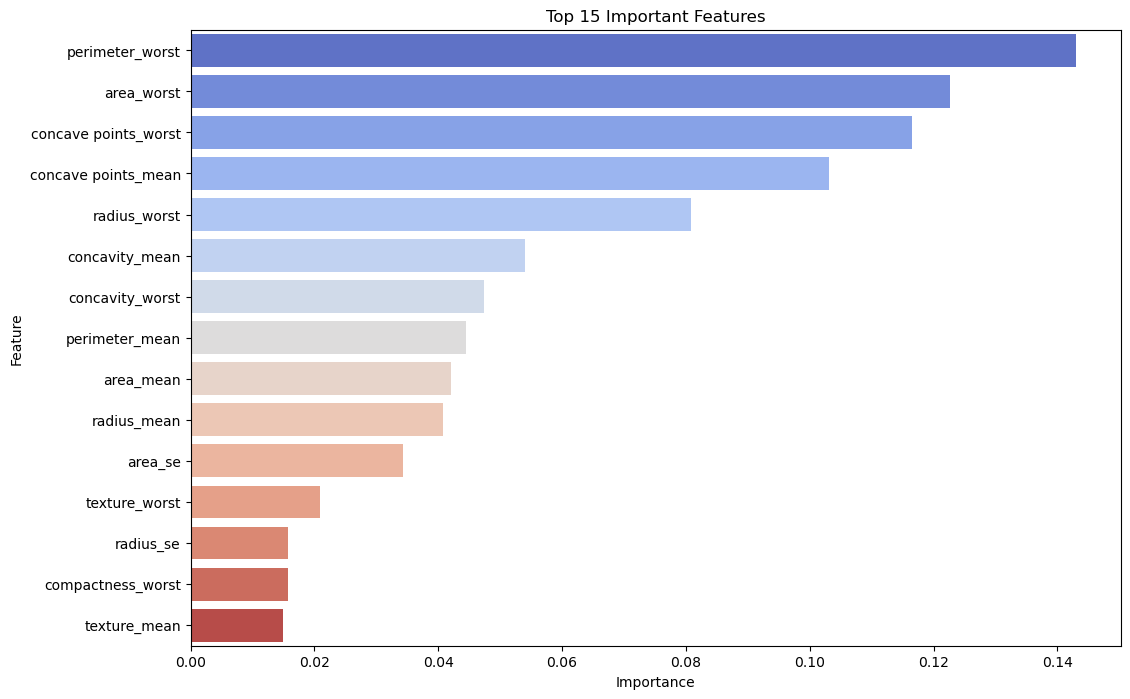

In [13]:
forest = RandomForestClassifier(n_estimators=500, random_state=42)
forest.fit(X_res, y_res)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=Fals
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(15), palette="coolwarm")
plt.title('Top 15 Important Features')
plt.show(
top_features = feat_imp['Feature'][:15].values
X_top = X_res[top_features]


In [14]:
fit_model(X_top, y_res, 'RandomForest_TopFeatures', RandomForestClassifier(), param_rf, cv=10)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Parameters for RandomForest_TopFeatures: {'n_estimators': 500}

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        69
           1       0.97      0.99      0.98        74

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Accuracy Score: 0.9790209790209791
Confusion Matrix:
 [[67  2]
 [ 1 73]]


In [15]:
fit_model(X_top, y_res, 'SVC_TopFeatures', SVC(), param_svm, cv=10)


Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best Parameters for SVC_TopFeatures: {'C': 1000, 'gamma': 0.0001}

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        69
           1       0.97      0.93      0.95        74

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

Accuracy Score: 0.951048951048951
Confusion Matrix:
 [[67  2]
 [ 5 69]]


In [16]:
fit_model(X_top, y_res, 'XGBoost_TopFeatures', XGBClassifier(), param_xgb, cv=10)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Parameters for XGBoost_TopFeatures: {'n_estimators': 500}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        69
           1       0.96      1.00      0.98        74

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Accuracy Score: 0.9790209790209791
Confusion Matrix:
 [[66  3]
 [ 0 74]]


In [17]:
def load_and_predict(model_name, X, y):
    """
    Load a trained model and evaluate on given data.
    """
    model = pickle.load(open(f"{model_name}.pkl", "rb"))
    y_pred = model.predict(X)
    print(f"Loaded Model: {model_name}")
    print("Best Parameters:", model.best_params_)
    print("\nAccuracy Score:", accuracy_score(y, y_pred))
    print("\nClassification Report:\n", classification_report(y, y_pred))

load_and_predict('XGBoost', X, y)


Loaded Model: XGBoost
Best Parameters: {'n_estimators': 100}

Accuracy Score: 0.9964850615114236

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       357
           1       0.99      1.00      1.00       212

    accuracy                           1.00       569
   macro avg       1.00      1.00      1.00       569
weighted avg       1.00      1.00      1.00       569

